In [1]:
import numpy as np
import requests
from   bs4 import BeautifulSoup
import pandas as pd
from datetime import date, timedelta

In [2]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [3]:
df1=[[],[],[],[],[],[],[],[],[],[],[]]

In [4]:
def update_data(r,data):
    soup = BeautifulSoup(r.content, 'html.parser')
    data['__VIEWSTATE']          = soup.find('input', attrs={'id': '__VIEWSTATE'})['value']
    data['__VIEWSTATEGENERATOR'] = soup.find('input', attrs={'id': '__VIEWSTATEGENERATOR'})['value']
    data['__EVENTVALIDATION']    = soup.find('input', attrs={'id': '__EVENTVALIDATION'})['value']

def get_report_html(date):
    url = 'https://fcainfoweb.nic.in/reports/report_menu_web.aspx'
    headers = { 'User-Agent': 'Mozilla/5.0' }

    s = requests.Session()
    s.headers.update(headers)

    data = {
        '__EVENTTARGET': 'ctl00$MainContent$Rbl_Rpt_type$0',
        '__VIEWSTATEENCRYPTED': '',
        'ctl00$MainContent$Ddl_Rpt_type': 'Retail',
        'ctl00$MainContent$ddl_Language': 'English',
        'ctl00$MainContent$Rbl_Rpt_type': 'Price report',
    }
    r = s.get(url)
    update_data(r,data)

    """Select Price Report"""
    r = s.post(url, data=data)
    update_data(r,data)

    """Select Daily Prices"""
    data['__EVENTTARGET'] = 'ctl00$MainContent$Ddl_Rpt_Option0'
    data['ctl00$MainContent$Ddl_Rpt_Option0'] = 'Daily Prices'

    r = s.post(url, data=data)
    update_data(r,data)

    data['__EVENTTARGET'] = ''
    data['ctl00$MainContent$Txt_FrmDate']  = date
    data['ctl00$MainContent$btn_getdata1'] =  'Get Data'

    """Select Date + Get Data"""
    r = s.post(url, data=data)
    #return r
    #print(r.text)
    #df_list=pd.read_html(r.text,header=[1])
    df=pd.read_html(r.text,header=[1],encoding='lxml')[0]
    df.drop([0,1],inplace=True)
    df1=df[df["Centre"].isin(["EAST ZONE","NORTH ZONE","WEST ZONE","SOUTH ZONE","NORTH EAST ZONE"])]
    df.drop(df1.index,inplace=True)
    df=df[4:-11]

    #replacing NR with np.nan
    df=df.replace("NR",np.nan)
    
    #converting the datatype of columns to numeric
    l=df.columns
    for i in range(1,len(l)):
        df[l[i]] = pd.to_numeric(df[l[i]])
    #print(df.head(1))
    
    #file_name="prices1.csv"
    #df.to_csv(file_name,index=False)
    return df

In [5]:
# this is not working in my local computer, so I am using colab to run this code, 
# where it is working fine. Use colab for this note book
start_date = date(2014, 1, 1)
end_date = date(2014, 1, 5)
for single_date in daterange(start_date, end_date):
    date1=str(single_date.strftime("%d/%m/%Y"))
    print(date1)
    places=["CHENNAI","DELHI","LUCKNOW","SHIMLA","MUMBAI","AHMEDABAD","KOLKATA","PATNA","GUWAHATI","PORT BLAIR","HYDERABAD"]
    df=get_report_html(date1)
    
    for i,place in enumerate(places):
        x=df[df["Centre"]==place]    
        t=x.values.flatten().tolist()    
        if len(t)==0:
            t.append(place)
            t+=[np.nan]*22        
        t.append(date1)
        df1[i].append(t)
    

01/01/2014


ImportError: lxml not found, please install it

In [30]:
# places=["CHENNAI","DELHI","LUCKNOW","SHIMLA","MUMBAI","AHMEDABAD","KOLKATA","PATNA","GUWAHATI","PORT BLAIR","HYDERABAD"]
# len(places)

In [105]:
# x=df[df["Centre"]=="HYDERABAD"]
# t=x.values.flatten().tolist()
# if len(t)==0:
#     t.append("HYDERABAD")
#     t+=[0]*22
#     t.append(date1)
# t.append("1/1/2020")
# df1.append(t)


In [31]:
df2 = pd.DataFrame(df1)
df2

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [129]:
df2


0     1     2     3     4      5      6      7     8     9   ...  \
0     CHENNAI   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN  ...   
1     CHENNAI  31.0  31.0  32.0  52.0   68.0   73.0   88.0  56.0  32.0  ...   
2     CHENNAI  31.0  31.0  32.0  52.0   68.0   73.0   88.0  56.0  32.0  ...   
3     CHENNAI   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN  ...   
4     CHENNAI   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...    ...    ...    ...   ...   ...  ...   
3127  CHENNAI  57.0  41.0  34.0  71.0  105.0  112.0  102.0  93.0  40.0  ...   
3128  CHENNAI  57.0  41.0  34.0  71.0  105.0  112.0  102.0  93.0  40.0  ...   
3129  CHENNAI  57.0  39.0  34.0  69.0  105.0  109.0   99.0  93.0  40.0  ...   
3130  CHENNAI  58.0  39.0  34.0  69.0  106.0  111.0  101.0  95.0  40.0  ...   
3131  CHENNAI  58.0  39.0  34.0  69.0  106.0  111.0  101.0  95.0  40.0  ...   

      14     15     16    17     18    19    20    21    22          23  
0    NaN    NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN  01/01/2014  
1    NaN   95.0   70.0  51.0  220.0  16.0  22.0  17.0  13.0  02/01/2014  
2    NaN   95.0   70.0  51.0  220.0  16.0  22.0  19.0  10.0  03/01/2014  
3    NaN    NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN  04/01/2014  
4    NaN    NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN  05/01/2014  
...   ..    ...    ...   ...    ...   ...   ...   ...   ...         ...  
3127 NaN  177.0  123.0  49.0  303.0  21.0  37.0  27.0  13.0  25/07/2022  
3128 NaN  176.0  123.0  49.0  303.0  21.0  37.0  27.0  15.0  26/07/2022  
3129 NaN  176.0  123.0  49.0  303.0  21.0  37.0  27.0  16.0  27/07/2022  
3130 NaN  176.0  123.0  49.0  303.0  21.0  37.0  27.0  16.0  28/07/2022  
3131 NaN  178.0  123.0  49.0  303.0  21.0  37.0  27.0  15.0  29/07/2022  

[3132 rows x 24 columns]

In [130]:
file_name="pricesChennai.csv"
df2.to_csv(file_name,index=False)

In [5]:
df2=pd.read_csv("pricesChennai.csv")

<AxesSubplot:xlabel='23'>

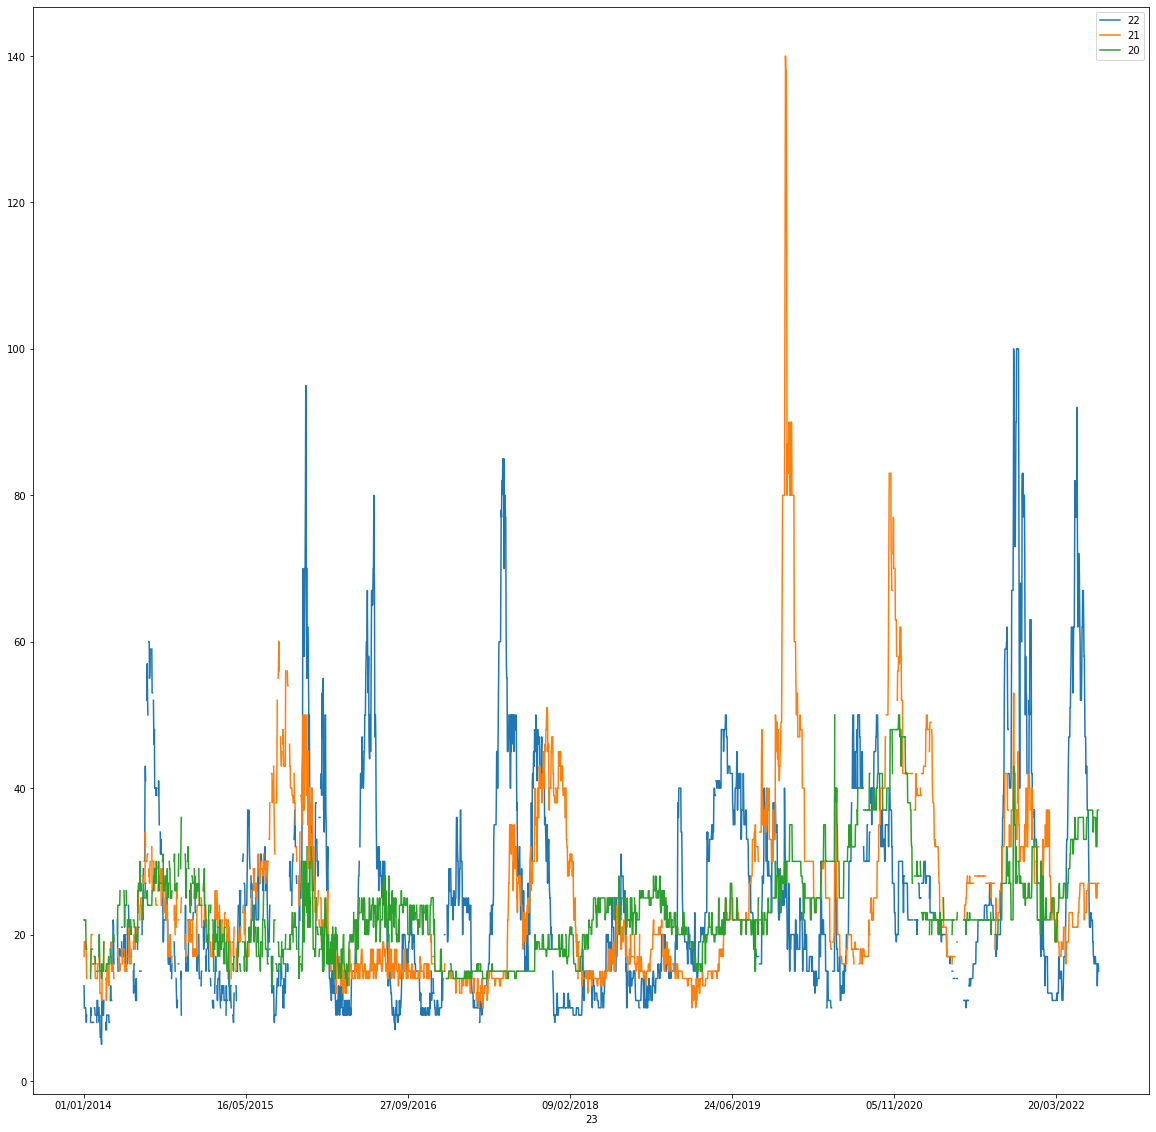

In [16]:
df2.plot.line(x=23,y=[22,21,20],figsize=(20,20))

In [138]:
df2[2].isna().sum()

371

In [139]:
df2.shape

(3132, 24)

In [140]:
371/3132

0.11845466155810984

In [6]:
df2.describe()

1            2            3            4            5  \
count  2761.000000  2761.000000  2753.000000  2757.000000  2760.000000   
mean     40.232524    34.116624    33.590628    73.584331    98.990942   
std      10.308831     3.130174     3.601500    17.396862    23.905492   
min      27.000000    30.000000    29.000000    46.000000    64.000000   
25%      32.000000    32.000000    31.000000    64.000000    77.000000   
50%      36.000000    34.000000    33.000000    71.000000    94.000000   
75%      52.000000    37.000000    35.000000    78.000000   112.000000   
max      59.000000    41.000000    45.000000   138.000000   200.000000   

                 6            7            8            9           10  ...  \
count  2761.000000  2760.000000  2759.000000  2755.000000  2699.000000  ...   
mean    107.015936    96.554348    75.716926    38.941924    38.257503  ...   
std      26.987580    16.765939    13.572168     4.158913     3.529293  ...   
min      71.000000    68.000000    49.000000    27.000000    27.000000  ...   
25%      85.000000    80.000000    62.000000    37.000000    37.000000  ...   
50%     104.000000    98.000000    77.000000    39.000000    37.000000  ...   
75%     122.000000   111.000000    89.000000    42.000000    40.000000  ...   
max     190.000000   133.000000   101.000000    47.000000    43.000000  ...   

                13    14           15           16           17           18  \
count  2745.000000   2.0  2749.000000  2738.000000  2751.000000  2743.000000   
mean    107.972678  53.0   110.076028    84.223886    56.639767   229.169158   
std      21.548245   0.0    27.836581    26.301696     6.995063    23.054414   
min      80.000000  53.0    85.000000    52.000000    45.000000   220.000000   
25%      94.000000  53.0    92.000000    67.000000    51.000000   220.000000   
50%     101.000000  53.0    97.000000    73.000000    56.000000   220.000000   
75%     104.000000  53.0   115.000000    93.000000    62.000000   220.000000   
max     183.000000  53.0   207.000000   162.000000    77.000000   367.000000   

                19           20           21           22  
count  2755.000000  2757.000000  2757.000000  2755.000000  
mean     18.149546    23.339499    25.300326    25.441379  
std       0.905159     6.918828    13.636656    15.715994  
min      16.000000    13.000000    10.000000     5.000000  
25%      17.000000    19.000000    15.000000    14.000000  
50%      18.000000    22.000000    21.000000    20.000000  
75%      19.000000    26.000000    30.000000    32.000000  
max      21.000000    50.000000   140.000000   100.000000  

[8 rows x 22 columns]

In [15]:
df2[df2['1'].isin([31,32])]

0     1     2     3     4     5     6     7     8     9  ...  14  \
1     CHENNAI  31.0  31.0  32.0  52.0  68.0  73.0  88.0  56.0  32.0  ... NaN   
2     CHENNAI  31.0  31.0  32.0  52.0  68.0  73.0  88.0  56.0  32.0  ... NaN   
5     CHENNAI  31.0  31.0  32.0  52.0  68.0  73.0  88.0  56.0  32.0  ... NaN   
6     CHENNAI  31.0  31.0  32.0  52.0  68.0  73.0  88.0  56.0  32.0  ... NaN   
7     CHENNAI  32.0  31.0  32.0  52.0  70.0  73.0  88.0  56.0  32.0  ... NaN   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ..   
1885  CHENNAI  32.0  35.0  33.0  68.0  87.0  84.0  85.0  62.0  37.0  ... NaN   
1886  CHENNAI  32.0  35.0  33.0  68.0  87.0  84.0  85.0  62.0  37.0  ... NaN   
1887  CHENNAI  32.0  35.0  33.0  68.0  87.0  84.0  85.0  62.0  37.0  ... NaN   
1888  CHENNAI  32.0  35.0  33.0  68.0  87.0  84.0  85.0  62.0  37.0  ... NaN   
1889  CHENNAI  32.0  35.0  33.0  68.0  87.0  84.0  85.0  62.0  37.0  ... NaN   

         15    16    17     18    19    20    21    22          23  
1      95.0  70.0  51.0  220.0  16.0  22.0  17.0  13.0  02/01/2014  
2      95.0  70.0  51.0  220.0  16.0  22.0  19.0  10.0  03/01/2014  
5      95.0  70.0  51.0  220.0  16.0  22.0  19.0  10.0  06/01/2014  
6      95.0  70.0  51.0  220.0  16.0  22.0  18.0  10.0  07/01/2014  
7      93.0  69.0  52.0  220.0  17.0  19.0  18.0   9.0  08/01/2014  
...     ...   ...   ...    ...   ...   ...   ...   ...         ...  
1885  101.0  74.0  57.0  220.0  18.0  17.0  12.0  23.0  01/03/2019  
1886  101.0  74.0  57.0  220.0  18.0  17.0  12.0  16.0  02/03/2019  
1887  101.0  74.0  57.0  220.0  18.0  17.0  12.0  16.0  03/03/2019  
1888  101.0  74.0  57.0  220.0  18.0  16.0  10.0  15.0  04/03/2019  
1889  101.0  74.0  57.0  220.0  18.0  15.0  11.0  16.0  05/03/2019  

[331 rows x 24 columns]

In [24]:
r=[[],[]]


In [25]:
r[0].append(2)

In [26]:
r

[[2], []]